In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [158]:
data = pd.read_csv('data_train_test.csv')

In [159]:
data

patient_id  patient_nhd patient_ds              rec_date_time  \
0             1          1.0       тест  2020-10-24 02:42:08+00:00   
1             2          NaN        NaN  2020-10-24 02:50:58+00:00   
2             3          2.0        NaN  2020-10-24 02:51:03+00:00   
3             4          3.0        NaN  2020-10-24 07:34:26+00:00   
4             5          4.0        NaN  2020-10-24 07:35:19+00:00   
..          ...          ...        ...                        ...   
901         316        367.0        NaN  2022-06-07 13:06:24+00:00   
902         315        355.0        NaN  2022-06-09 10:52:04+00:00   
903         320        375.0        NaN  2022-06-10 13:37:18+00:00   
904         321        390.0        NaN  2022-06-18 11:57:48+00:00   
905         315        355.0        NaN  2022-06-22 13:17:28+00:00   

             abs          std  norm_abs        mean          sd     median  \
0    4138.972396  5445.041312  0.139750  121.059432  132.735023  93.967742   
1    1526.677837  2586.943519  0.085180  131.110929  149.193446  94.806452   
2            NaN          NaN       NaN         NaN         NaN        NaN   
3    2144.847757  2810.485024  0.140241   87.980181  129.886494  65.793651   
4     596.217557   798.365461  0.131994  129.606324  203.627790  83.774194   
..           ...          ...       ...         ...         ...        ...   
901          NaN          NaN       NaN         NaN         NaN        NaN   
902          NaN          NaN       NaN         NaN         NaN        NaN   
903          NaN          NaN       NaN         NaN         NaN        NaN   
904          NaN          NaN       NaN         NaN         NaN        NaN   
905          NaN          NaN       NaN         NaN         NaN        NaN   

          mode        Q25         Q75        IQR      skew       kurt     kx2  \
0    72.209677  62.790323  135.483871  72.693548  5.279617  35.316137  7257.0   
1    87.903226  68.548387  129.080645  60.532258  6.084524  47.850833  3502.0   
2          NaN        NaN         NaN        NaN       NaN        NaN     NaN   
3    41.000000  43.761905   93.444444  49.682540  6.279688  49.033671  3755.0   
4    62.000000  59.000000  115.854839  56.854839  6.137953  47.466975   154.0   
..         ...        ...         ...        ...       ...        ...     ...   
901        NaN        NaN         NaN        NaN       NaN        NaN     NaN   
902        NaN        NaN         NaN        NaN       NaN        NaN     NaN   
903        NaN        NaN         NaN        NaN       NaN        NaN     NaN   
904        NaN        NaN         NaN        NaN       NaN        NaN     NaN   
905        NaN        NaN         NaN        NaN       NaN        NaN     NaN   

     n_pic  patient_manual_class  
0     12.0                   NaN  
1     17.0                   NaN  
2      NaN                   NaN  
3     16.0                   NaN  
4     13.0                   NaN  
..     ...                   ...  
901    NaN                   NaN  
902    NaN                   NaN  
903    NaN                   NaN  
904    NaN                   NaN  
905    NaN                   NaN  

[906 rows x 19 columns]

In [160]:
 a = data['patient_manual_class']
 a = a.replace(np.nan, 0)
 a = a.replace(2, 0)
 data['patient_manual_class'] = a
 data.head()

patient_id  patient_nhd patient_ds              rec_date_time          abs  \
0           1          1.0       тест  2020-10-24 02:42:08+00:00  4138.972396   
1           2          NaN        NaN  2020-10-24 02:50:58+00:00  1526.677837   
2           3          2.0        NaN  2020-10-24 02:51:03+00:00          NaN   
3           4          3.0        NaN  2020-10-24 07:34:26+00:00  2144.847757   
4           5          4.0        NaN  2020-10-24 07:35:19+00:00   596.217557   

           std  norm_abs        mean          sd     median       mode  \
0  5445.041312  0.139750  121.059432  132.735023  93.967742  72.209677   
1  2586.943519  0.085180  131.110929  149.193446  94.806452  87.903226   
2          NaN       NaN         NaN         NaN        NaN        NaN   
3  2810.485024  0.140241   87.980181  129.886494  65.793651  41.000000   
4   798.365461  0.131994  129.606324  203.627790  83.774194  62.000000   

         Q25         Q75        IQR      skew       kurt     kx2  n_pic  \
0  62.790323  135.483871  72.693548  5.279617  35.316137  7257.0   12.0   
1  68.548387  129.080645  60.532258  6.084524  47.850833  3502.0   17.0   
2        NaN         NaN        NaN       NaN        NaN     NaN    NaN   
3  43.761905   93.444444  49.682540  6.279688  49.033671  3755.0   16.0   
4  59.000000  115.854839  56.854839  6.137953  47.466975   154.0   13.0   

   patient_manual_class  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [161]:
data = data.dropna()
data

patient_id  patient_nhd  \
0             1          1.0   
7             8       1963.0   
8             9          7.0   
9             9          7.0   
12           12         48.0   
..          ...          ...   
642          24         24.0   
643          47         13.0   
644          47         13.0   
645          25         10.0   
646          17         12.0   

                                            patient_ds  \
0                                                 тест   
7    2011  лев рука ср/3  (1 фистула)  ТСПН кальцин...   
8    2010  лев рука ср/3  (1 фистула) псевдоаневриз...   
9    2010  лев рука ср/3  (1 фистула) псевдоаневриз...   
12   2020   лев рука нижняя/3  (1 фистула)   большо...   
..                                                 ...   
642  2009  пр рука верх/3  (4 фистула)  аневризма, ...   
643     2019  лев рука верх/3  (2 фистула)  Y образная   
644     2019  лев рука верх/3  (2 фистула)  Y образная   
645    2019  лев рука нижняя/3  (2 фистула)  аневризма   
646  2015  лев рука  (2 фистула)  аневризма, присте...   

                 rec_date_time          abs          std  norm_abs  \
0    2020-10-24 02:42:08+00:00  4138.972396  5445.041312  0.139750   
7    2020-10-24 07:46:25+00:00   477.020012   651.304517  0.127273   
8    2020-10-24 07:48:07+00:00  4081.864006  5408.359232  0.140010   
9    2020-10-24 07:49:33+00:00  3719.568824  4887.531205  0.126883   
12   2020-10-24 08:05:51+00:00   427.946990   650.850026  0.078221   
..                         ...          ...          ...       ...   
642  2020-11-27 04:51:46+00:00  4198.369322  5489.669560  0.186685   
643  2020-11-27 04:54:39+00:00  1117.789358  2043.296389  0.034113   
644  2020-11-27 04:55:09+00:00  2235.532317  3024.010080  0.096530   
645  2020-11-27 04:59:25+00:00  4300.808858  5571.654900  0.199759   
646  2020-11-27 04:59:58+00:00  1920.789693  2527.350331  0.150839   

           mean          sd     median       mode        Q25         Q75  \
0    121.059432  132.735023  93.967742  72.209677  62.790323  135.483871   
7    123.922740  223.461825  69.081967  29.918033  43.131148  105.196721   
8     88.008607  110.421159  71.619048  76.174603  47.825397   97.333333   
9     99.071097  101.088521  81.317460  71.793651  53.111111  115.936508   
12   129.536269  210.251583  86.016129  84.725806  55.193548  117.919355   
..          ...         ...        ...        ...        ...         ...   
642   60.825012  131.419584  35.661290  19.516129  19.306452   64.725806   
643  164.747968  292.720010  37.661290   2.354839  12.677419  175.629032   
644   64.073389  164.450043  23.790323   2.403226   6.677419   52.919355   
645   62.159380  114.214684  37.645161  22.290323  21.274194   72.274194   
646   55.262888  136.657410  16.016129   2.338710   7.903226   36.419355   

            IQR       skew        kurt     kx2  n_pic  patient_manual_class  
0     72.693548   5.279617   35.316137  7257.0   12.0                   0.0  
7     62.065574   6.116062   46.998741    28.0   13.0                   0.0  
8     49.507937   6.192113   48.103969  5958.0   15.0                   1.0  
9     62.825397   5.538590   39.026997  6500.0   14.0                   1.0  
12    62.725806   5.551192   38.843619    16.0   20.0                   1.0  
..          ...        ...         ...     ...    ...                   ...  
642   45.419355   7.929550   81.366223  4737.0   10.0                   1.0  
643  162.951613  13.051749  272.189172  1384.0   15.0                   1.0  
644   46.241935  18.003405  492.427363  1869.0   17.0                   1.0  
645   51.000000   7.679767   76.050180  5166.0   12.0                   1.0  
646   28.516129  15.275356  319.326520  1389.0    8.0                   0.0  

[450 rows x 19 columns]

In [162]:
num_features = ['abs', 'std', 'norm_abs', 'mean', 'sd', 'median', 'mode', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'kx2', 'n_pic']
cat_features = ['patient_ds', 'rec_date_time']
X_train, X_test, y_train, y_test = train_test_split(data[num_features], data['patient_manual_class'], test_size=0.2, shuffle=False)

In [163]:
df = pd.DataFrame(data)

In [164]:
print("Виды АВФ: ",df.patient_manual_class.unique()), print("\n", df.groupby('patient_manual_class').size())

Виды АВФ:  [0. 1.]

 patient_manual_class
0.0     94
1.0    356
dtype: int64


(None, None)

In [165]:
print(y_train)

0      0.0
7      0.0
8      1.0
9      1.0
12     1.0
      ... 
522    1.0
523    1.0
524    1.0
525    1.0
526    1.0
Name: patient_manual_class, Length: 360, dtype: float64


In [166]:
print(X_train)

             abs          std  norm_abs        mean          sd      median  \
0    4138.972396  5445.041312  0.139750  121.059432  132.735023   93.967742   
7     477.020012   651.304517  0.127273  123.922740  223.461825   69.081967   
8    4081.864006  5408.359232  0.140010   88.008607  110.421159   71.619048   
9    3719.568824  4887.531205  0.126883   99.071097  101.088521   81.317460   
12    427.946990   650.850026  0.078221  129.536269  210.251583   86.016129   
..           ...          ...       ...         ...         ...         ...   
522   157.940236   254.036808  0.070509  222.415196  261.699667  130.206349   
523  1261.436713  1692.911644  0.126321  137.412082  161.527607   96.253968   
524  2173.178374  3222.570557  0.103955  136.585175  131.605617  100.269841   
525   235.304067   409.205041  0.076796  127.850106  237.151422   72.920635   
526   188.896190   275.785045  0.058482  164.417170  313.683871   55.396825   

           mode        Q25         Q75         IQR 

In [167]:
df_new = df
df_new = df_new.drop('patient_id', axis = 1)
df_new = df_new.drop('patient_nhd', axis = 1)
df_new = df_new.drop('patient_ds', axis = 1)
df_new = df_new.drop('rec_date_time', axis = 1)
df_new = df_new.drop('patient_manual_class', axis = 1)
print(df_new.columns)

Index(['abs', 'std', 'norm_abs', 'mean', 'sd', 'median', 'mode', 'Q25', 'Q75',
       'IQR', 'skew', 'kurt', 'kx2', 'n_pic'],
      dtype='object')


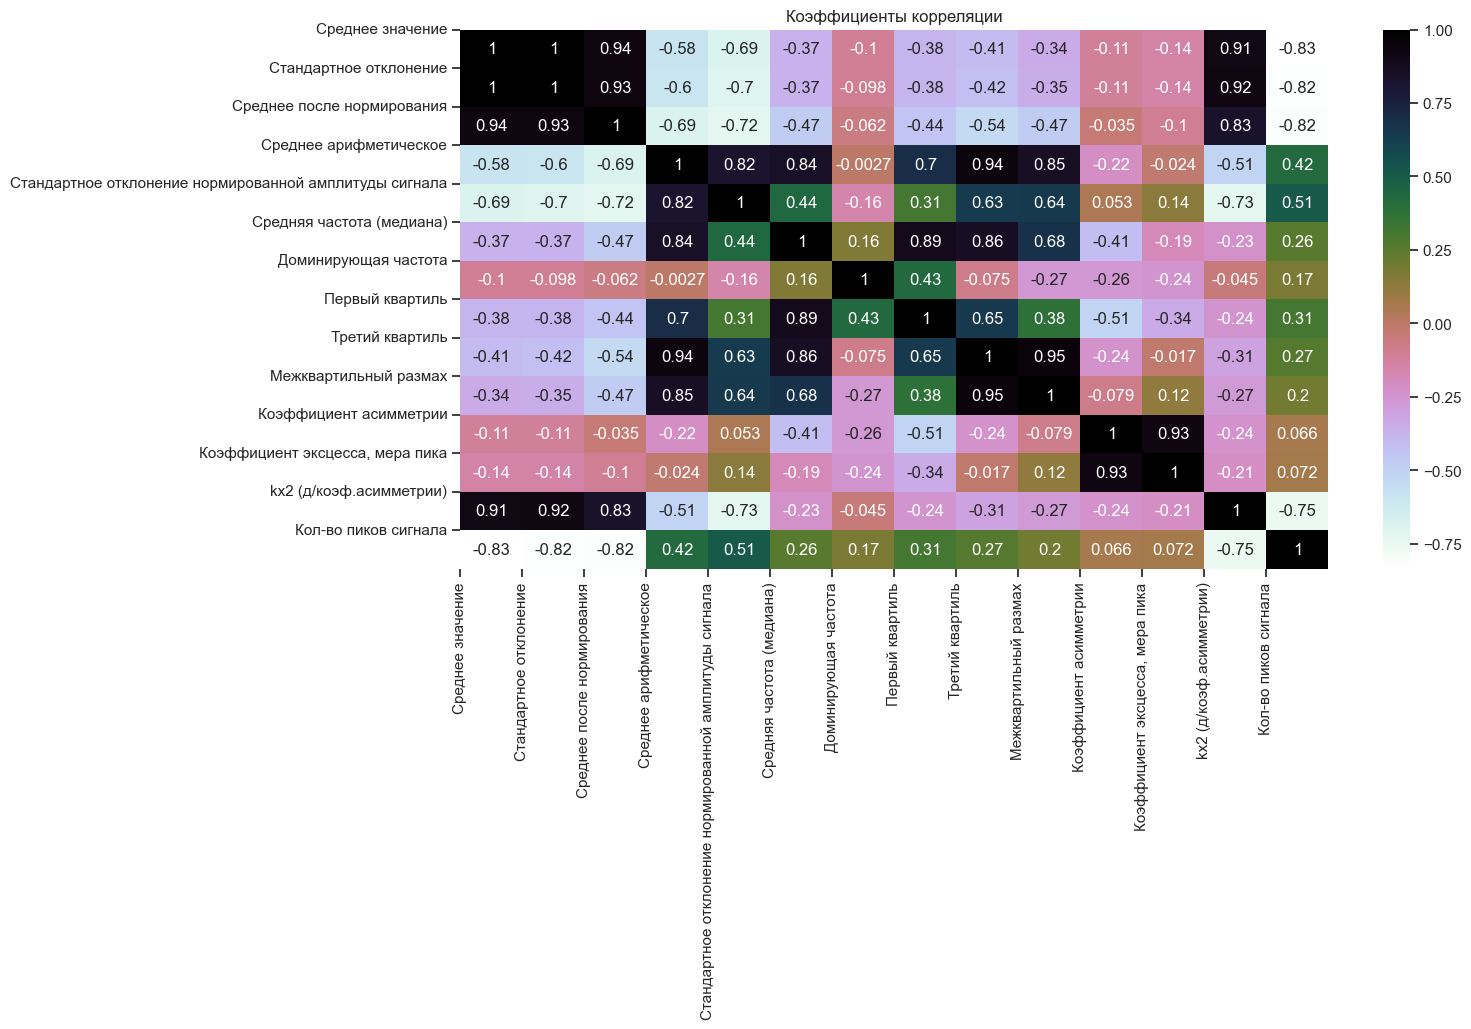

In [168]:
labels = ['Среднее значение', 'Стандартное отклонение', 'Среднее после нормирования', 'Cреднее арифметическое', 'Стандартное отклонение нормированной амплитуды сигнала',
          'Средняя частота (медиана)', 'Доминирующая частота', 'Первый квартиль', 'Третий квартиль','Межквартильный размах',
          'Коэффициент асимметрии', 'Коэффициент эксцесса, мера пика', 'kx2 (д/коэф.асимметрии)', 'Кол-во пиков сигнала']
plt.figure(figsize=(14, 7)) 
sns.heatmap(df_new.corr(),annot=True,cmap='cubehelix_r')  
plt.title('Коэффициенты корреляции')
ticks = ['Среднее значение', 'Стандартное отклонение', 'Среднее после нормирования', 'Cреднее арифметическое', 'Стандартное отклонение нормированной амплитуды сигнала',
          'Средняя частота (медиана)', 'Доминирующая частота', 'Первый квартиль', 'Третий квартиль','Межквартильный размах',
          'Коэффициент асимметрии', 'Коэффициент эксцесса, мера пика', 'kx2 (д/коэф.асимметрии)', 'Кол-во пиков сигнала']
x=['abs', 'std', 'norm_abs', 'mean', 'sd', 'median', 'mode', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'kx2', 'n_pic']
y=['abs', 'std', 'norm_abs', 'mean', 'sd', 'median', 'mode', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'kx2', 'n_pic']
line1, = plt.plot(x,y)
line1.remove()
plt.xticks(x,ticks,rotation=90)
plt.yticks(y,ticks,rotation=360)
plt.show()

Функциональная зависимость наблюдается между параметрами, на пресечении которых корреляция близка к 1 (уровень корреляции пропорционален темноте цвета)

Точечные диаграммы зависимости наиболее важного признака выборки (norm_abs, среднее нормированное значение) от других признаков, с которыми наблюдается относительно хорошая корреляция:

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


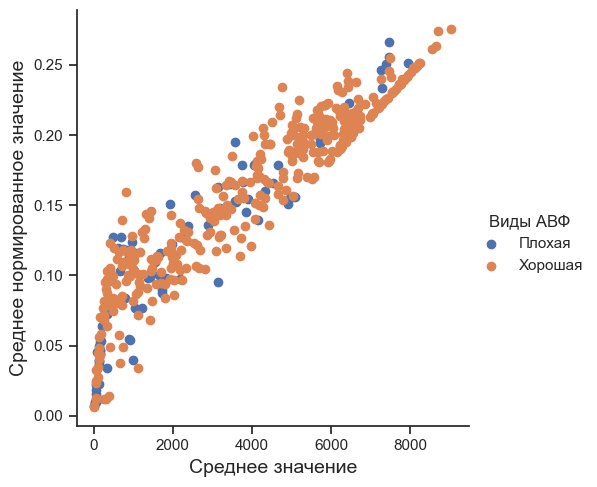

In [169]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'abs','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Среднее значение', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14)   

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


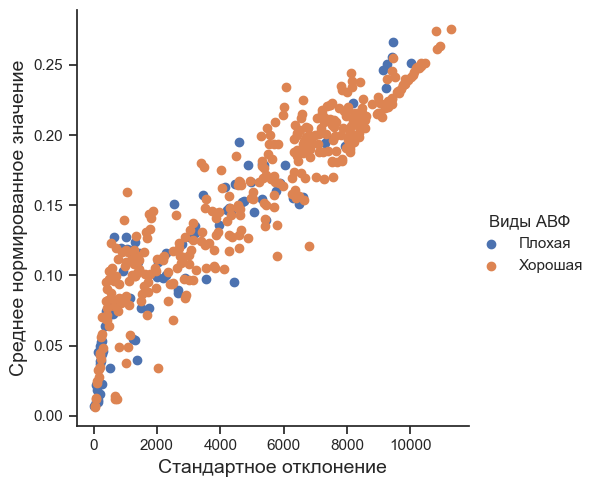

In [170]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'std','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Стандартное отклонение', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14)

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


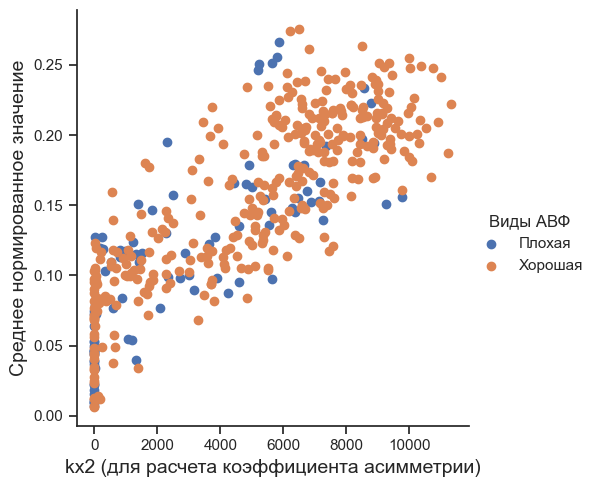

In [171]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'kx2','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('kx2 (для расчета коэффициента асимметрии)', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14)   

Точечные диаграммы зависимости наиболее важного признака выборки (norm_abs, среднее нормированное значение) от других признаков, с которыми наблюдается плохая корреляция:

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


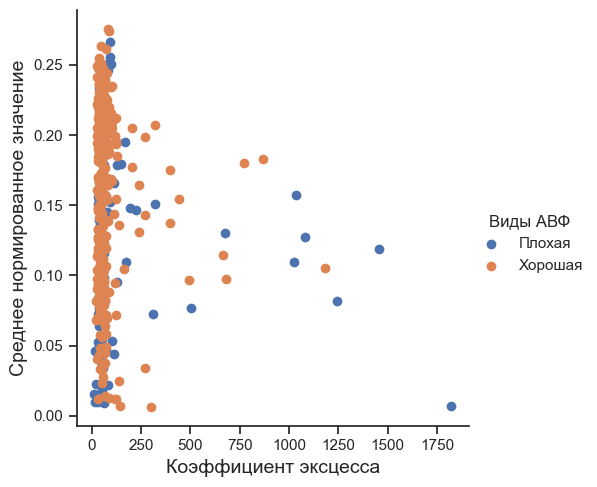

In [172]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'kurt','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Коэффициент эксцесса', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


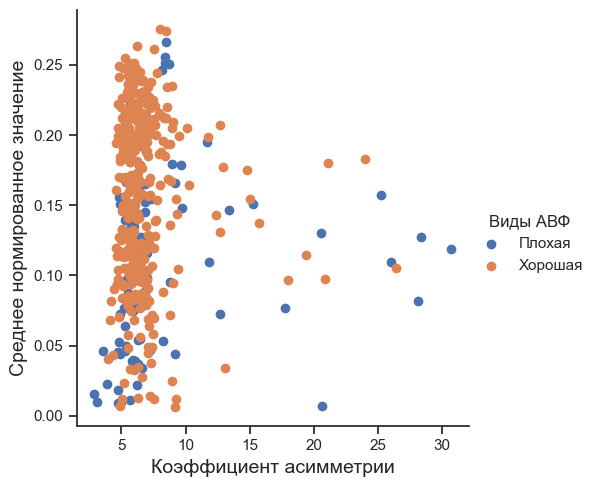

In [173]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'skew','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Коэффициент асимметрии', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


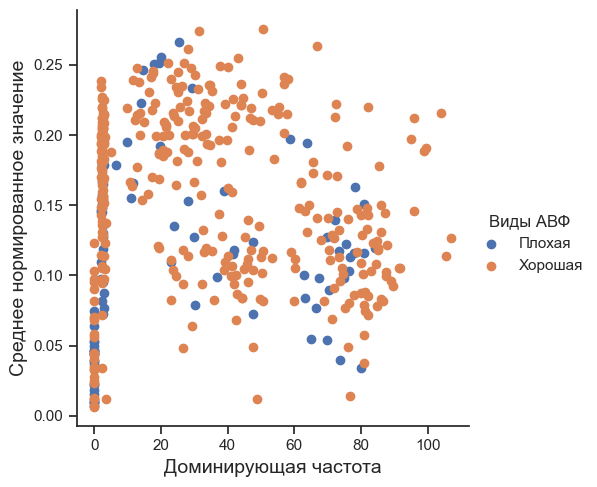

In [174]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'mode','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Доминирующая частота', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


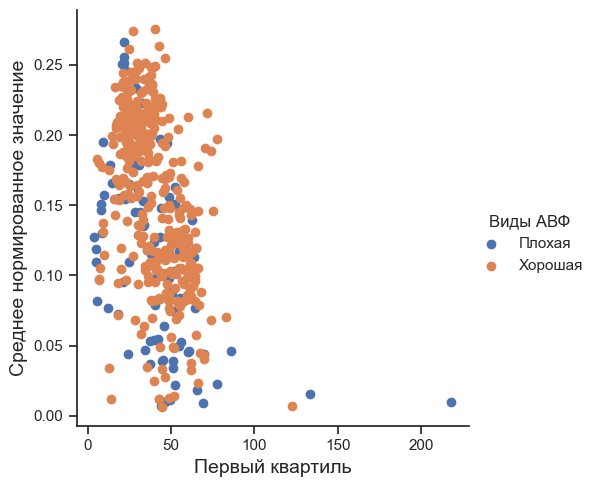

In [175]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'Q25','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Первый квартиль', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


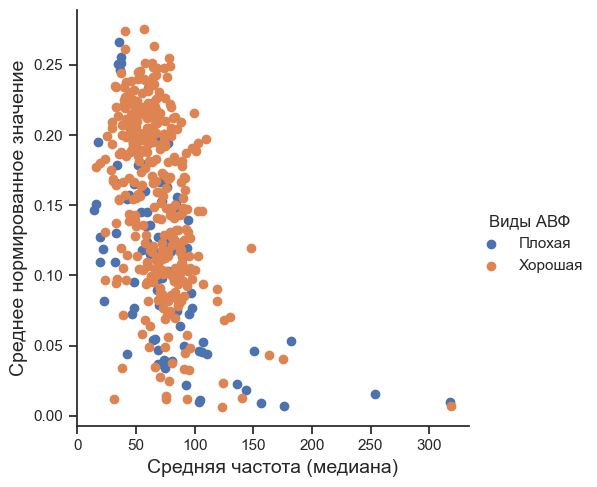

In [176]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'median','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Средняя частота (медиана)', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


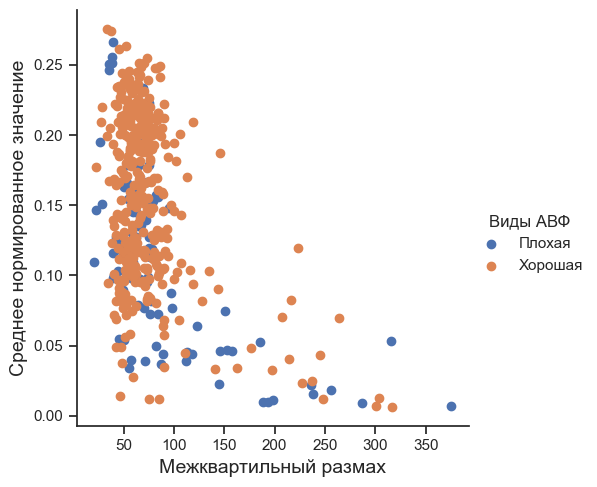

In [177]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'IQR','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Межквартильный размах', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


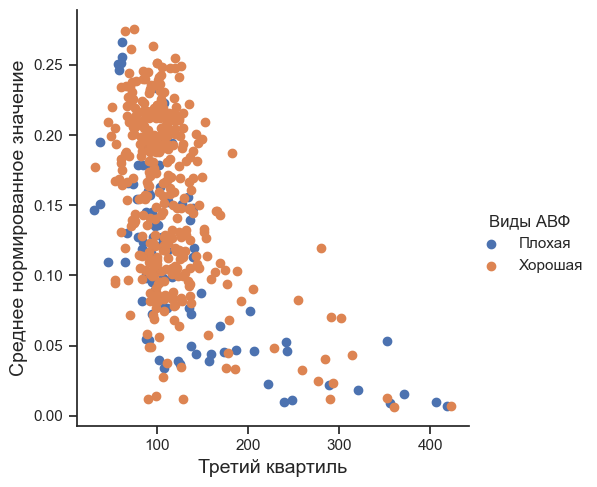

In [178]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'Q75','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Третий квартиль', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


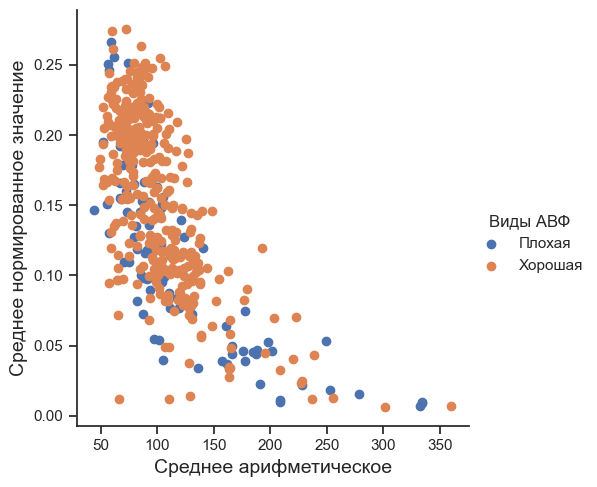

In [179]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'mean','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Среднее арифметическое', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14)   

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


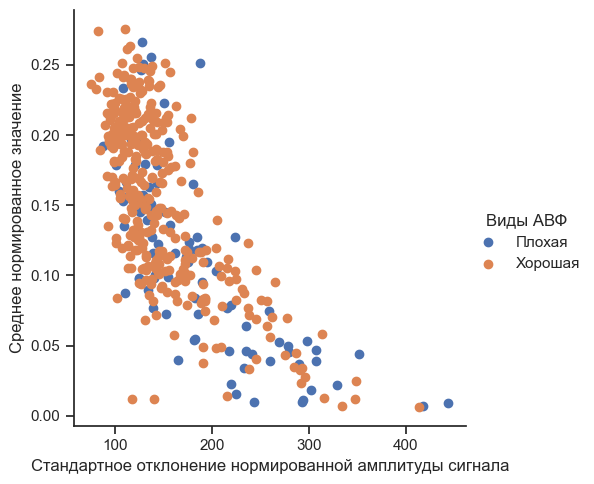

In [180]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'sd','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Стандартное отклонение нормированной амплитуды сигнала', fontsize=12)
    ax.set_ylabel('Среднее нормированное значение', fontsize=12)   

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


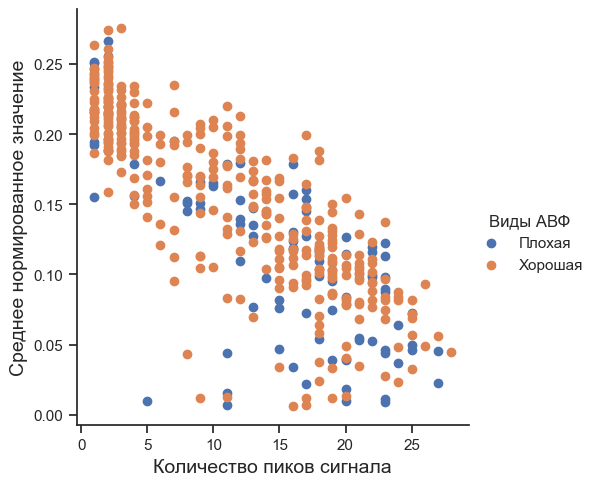

In [181]:
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'n_pic','norm_abs')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Количество пиков сигнала', fontsize=14)
    ax.set_ylabel('Среднее нормированное значение', fontsize=14) 

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


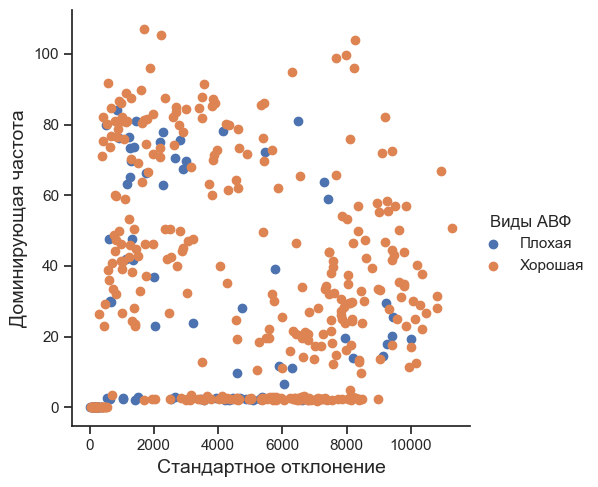

In [182]:
#этот график можно не публиковать, он просто для наглядности того, как выглядит плохая корреляция параметров
%matplotlib inline
g = sns.FacetGrid(df,hue='patient_manual_class',height=5)
g = g.map(plt.scatter,'std','mode')
g.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
for ax in g.axes.flat:
    ax.set_xlabel('Стандартное отклонение', fontsize=14)
    ax.set_ylabel('Доминирующая частота', fontsize=14)   

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


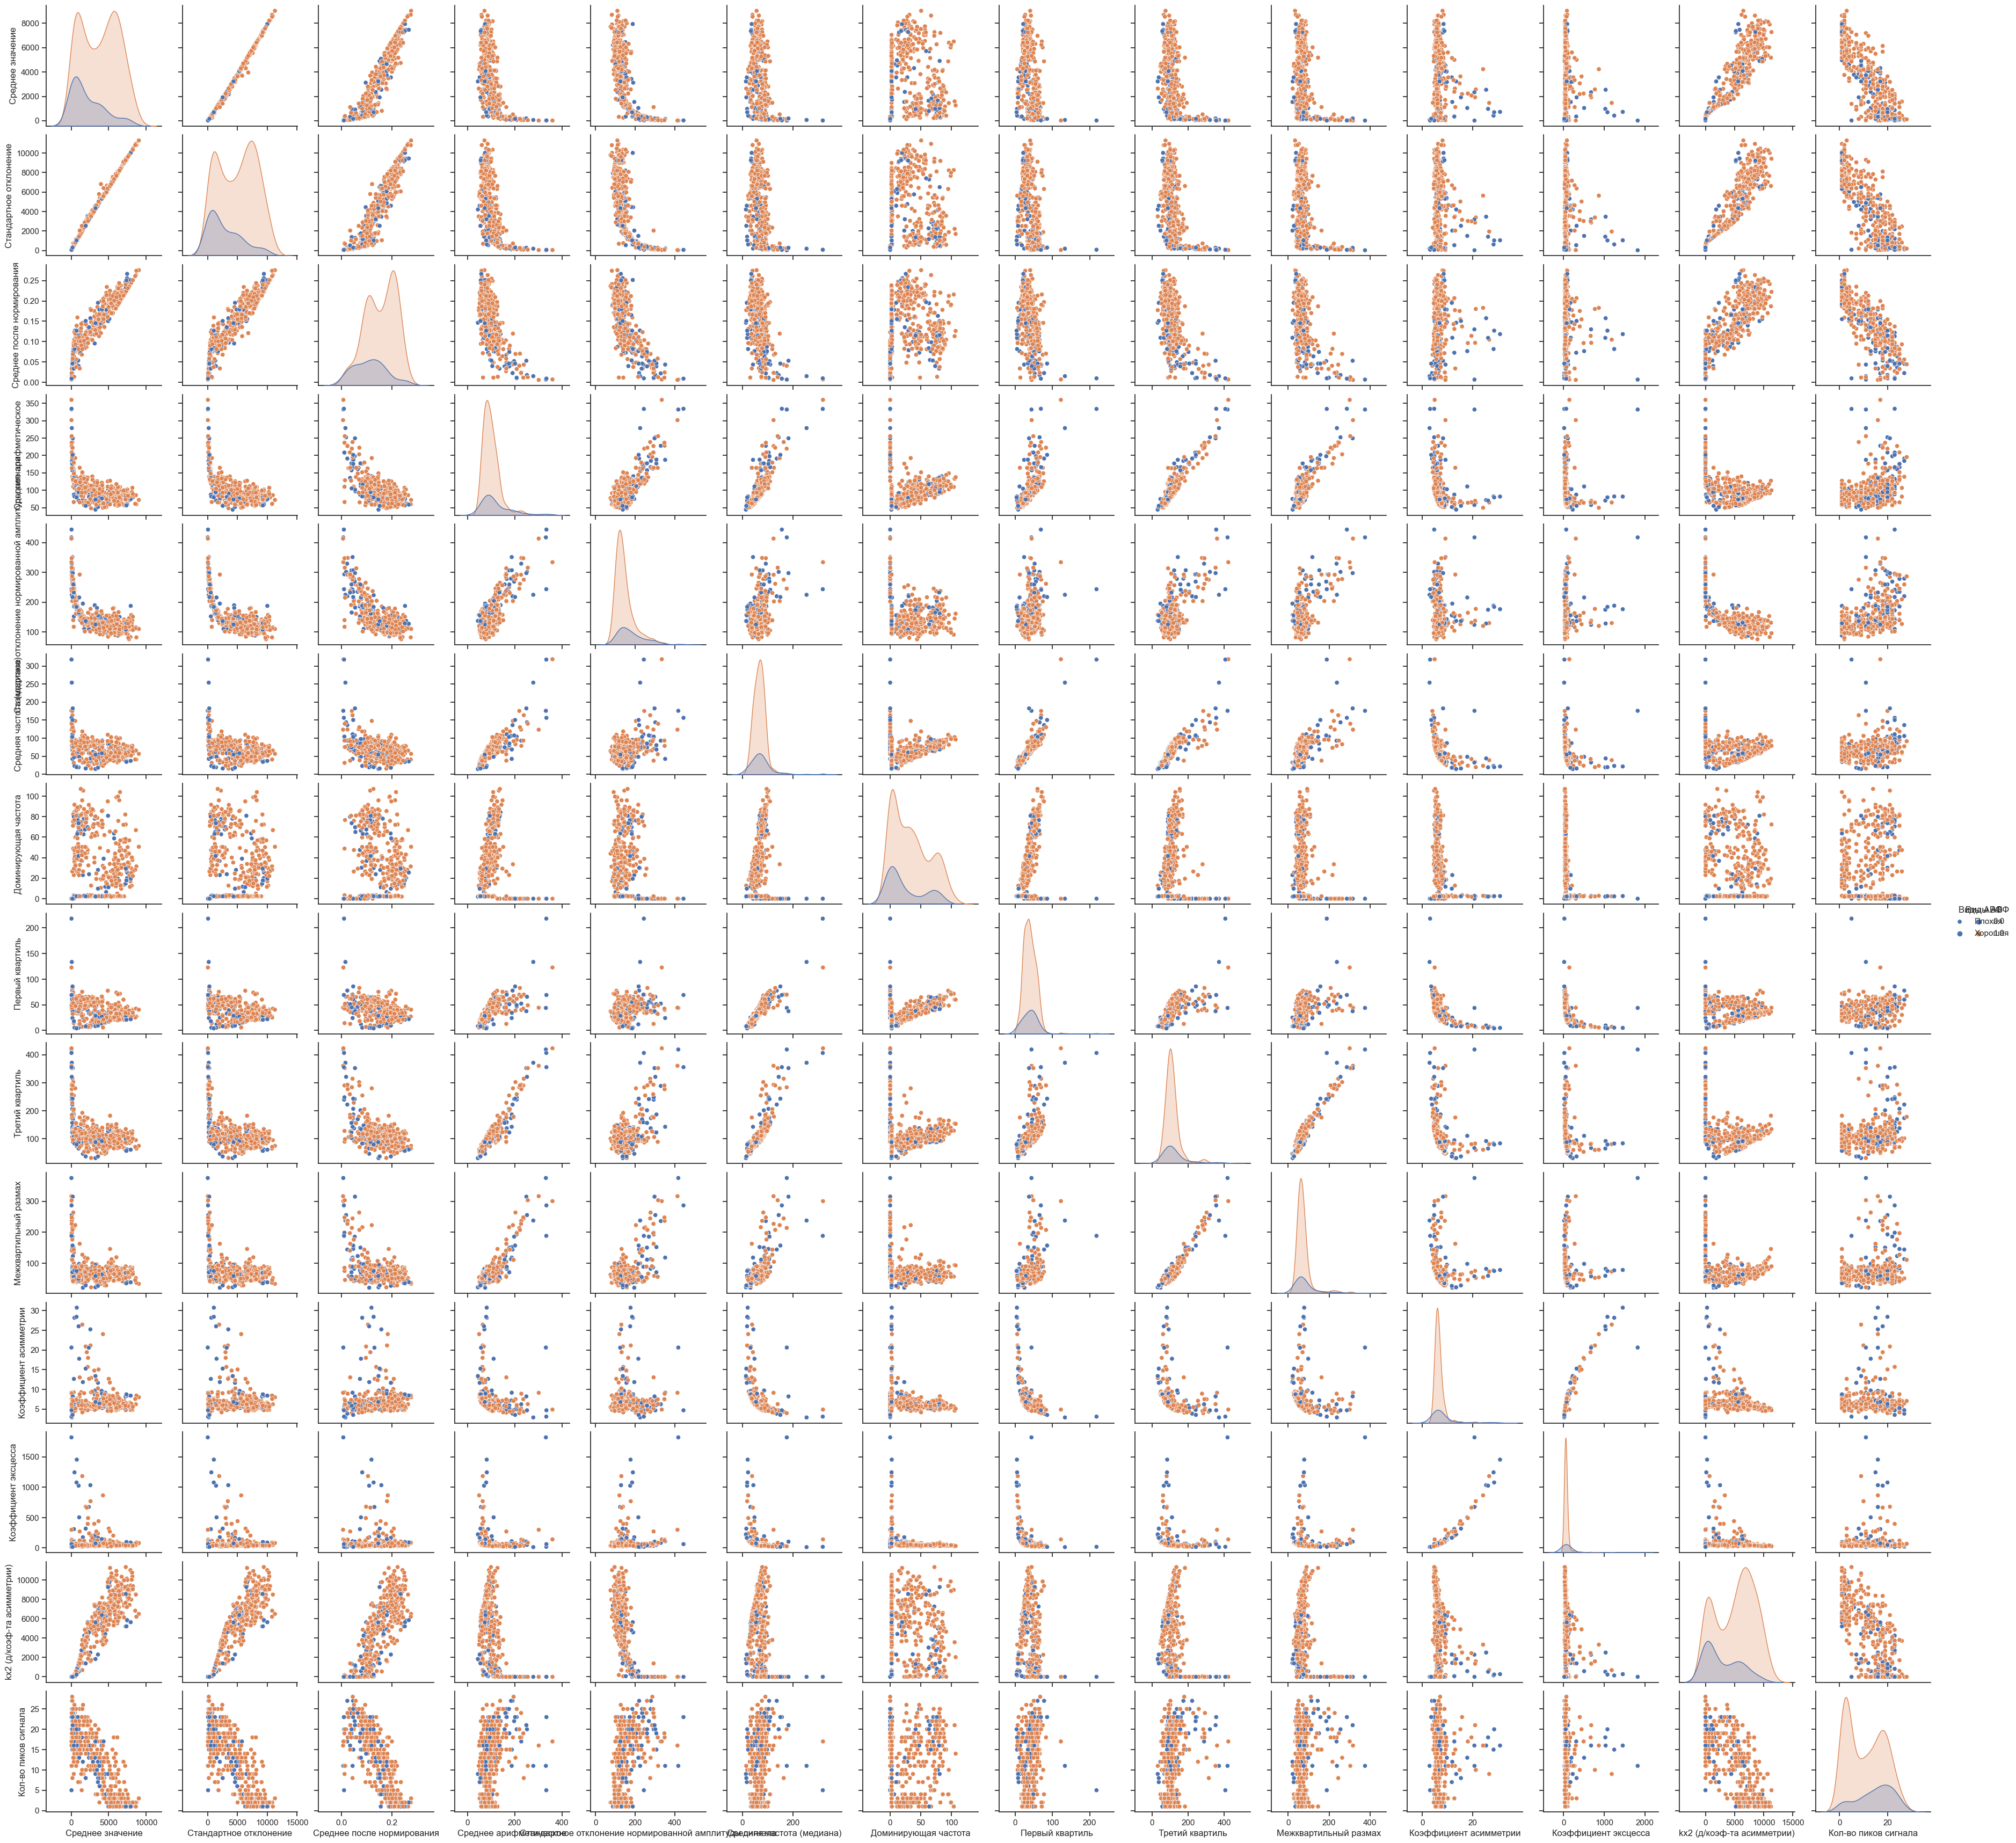

In [183]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
k=sns.pairplot(df.iloc[:,4:19], hue="patient_manual_class")
k._legend.set_title('Виды АВФ')
k.add_legend(title='Виды АВФ', labels=['Плохая','Хорошая'])
replacements = {'abs': 'Среднее значение', 
                'std': 'Стандартное отклонение',
                'norm_abs': 'Среднее после нормирования', 
                'mean': 'Cреднее арифметическое',
                'sd': 'Стандартное отклонение нормированной амплитуды сигнала',
                'median': 'Средняя частота (медиана)',
                'mode': 'Доминирующая частота',
                'Q25': 'Первый квартиль',
                'Q75': 'Третий квартиль',
                'IQR': 'Межквартильный размах',
                'skew': 'Коэффициент асимметрии',
                'kurt': 'Коэффициент эксцесса',
                'kx2': 'kx2 (д/коэф-та асимметрии)',
                'n_pic': 'Кол-во пиков сигнала'
               }

for i in range(14):
    for j in range(14):
        xlabel = k.axes[i][j].get_xlabel()
        ylabel = k.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            k.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            k.axes[i][j].set_ylabel(replacements[ylabel])


for i in range(len(k.fig.get_children()[-1].texts)):
    label = k.fig.get_children()[-1].texts[i].get_text()
    if label in replacements.keys():
        k.fig.get_children()[-1].texts[i].set_text(replacements[label])

In [184]:
models = []
models.append(('Метод логистической регрессии', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Метод линейного дискриминантного анализа', LinearDiscriminantAnalysis()))
models.append(('Метод "К-ближайших соседей"', KNeighborsClassifier()))
models.append(('Метод "Дерево решений"', DecisionTreeClassifier()))
models.append(('Метод "Наивный Байес"', GaussianNB()))
models.append(('Метод опорных векторов', SVC(gamma='auto')))
models.append(('Метод случайного леса', RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(('Метод бэггинга на дереве решений', BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,random_state=42)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Метод логистической регрессии: 0.769444 (0.008333)
Метод линейного дискриминантного анализа: 0.772222 (0.016667)
Метод "К-ближайших соседей": 0.763889 (0.008333)
Метод "Дерево решений": 0.686111 (0.025000)
Метод "Наивный Байес": 0.761111 (0.016667)
Метод опорных векторов: 0.788889 (0.000000)
Метод случайного леса: 0.800000 (0.005556)
Метод бэггинга на дереве решений: 0.766667 (0.005556)


Метод случайного леса - наиболее подходящий (среднее значение точности модели больше, чем у остальных моделей)

In [185]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=0)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
print(predictions_RF)
print("Прогноз модели: к классу 'АВФ' в тестовой части относится ", len(predictions_RF), "записей из выборки")

[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
Прогноз модели: к классу 'АВФ' в тестовой части относится  90 записей из выборки


In [186]:
import pickle
data = model_RF
with open('model_best_RF.pickle', 'wb') as f:
  pickle.dump(data, f)

In [187]:
model_LR = LogisticRegression(solver='liblinear', multi_class='ovr')
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)
print(predictions_LR)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [188]:
import pickle
data = model_LR
with open('model_LR.pickle', 'wb') as f:
  pickle.dump(data, f)

In [189]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train)
predictions_LDA = model_LDA.predict(X_test)
print(predictions_LDA)

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


In [190]:
import pickle
data = model_LDA
with open('model_LDA.pickle', 'wb') as f:
  pickle.dump(data, f)

In [191]:
model_KN = KNeighborsClassifier()
model_KN.fit(X_train, y_train)
predictions_KN = model_KN.predict(X_test)
print(predictions_KN)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [192]:
import pickle
data = model_KN
with open('model_KN.pickle', 'wb') as f:
  pickle.dump(data, f)

In [193]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predictions_NB = model_NB.predict(X_test)
print(predictions_NB)

[1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]


In [194]:
import pickle
data = model_NB
with open('model_NB.pickle', 'wb') as f:
  pickle.dump(data, f)

In [195]:
df

patient_id  patient_nhd  \
0             1          1.0   
7             8       1963.0   
8             9          7.0   
9             9          7.0   
12           12         48.0   
..          ...          ...   
642          24         24.0   
643          47         13.0   
644          47         13.0   
645          25         10.0   
646          17         12.0   

                                            patient_ds  \
0                                                 тест   
7    2011  лев рука ср/3  (1 фистула)  ТСПН кальцин...   
8    2010  лев рука ср/3  (1 фистула) псевдоаневриз...   
9    2010  лев рука ср/3  (1 фистула) псевдоаневриз...   
12   2020   лев рука нижняя/3  (1 фистула)   большо...   
..                                                 ...   
642  2009  пр рука верх/3  (4 фистула)  аневризма, ...   
643     2019  лев рука верх/3  (2 фистула)  Y образная   
644     2019  лев рука верх/3  (2 фистула)  Y образная   
645    2019  лев рука нижняя/3  (2 фистула)  аневризма   
646  2015  лев рука  (2 фистула)  аневризма, присте...   

                 rec_date_time          abs          std  norm_abs  \
0    2020-10-24 02:42:08+00:00  4138.972396  5445.041312  0.139750   
7    2020-10-24 07:46:25+00:00   477.020012   651.304517  0.127273   
8    2020-10-24 07:48:07+00:00  4081.864006  5408.359232  0.140010   
9    2020-10-24 07:49:33+00:00  3719.568824  4887.531205  0.126883   
12   2020-10-24 08:05:51+00:00   427.946990   650.850026  0.078221   
..                         ...          ...          ...       ...   
642  2020-11-27 04:51:46+00:00  4198.369322  5489.669560  0.186685   
643  2020-11-27 04:54:39+00:00  1117.789358  2043.296389  0.034113   
644  2020-11-27 04:55:09+00:00  2235.532317  3024.010080  0.096530   
645  2020-11-27 04:59:25+00:00  4300.808858  5571.654900  0.199759   
646  2020-11-27 04:59:58+00:00  1920.789693  2527.350331  0.150839   

           mean          sd     median       mode        Q25         Q75  \
0    121.059432  132.735023  93.967742  72.209677  62.790323  135.483871   
7    123.922740  223.461825  69.081967  29.918033  43.131148  105.196721   
8     88.008607  110.421159  71.619048  76.174603  47.825397   97.333333   
9     99.071097  101.088521  81.317460  71.793651  53.111111  115.936508   
12   129.536269  210.251583  86.016129  84.725806  55.193548  117.919355   
..          ...         ...        ...        ...        ...         ...   
642   60.825012  131.419584  35.661290  19.516129  19.306452   64.725806   
643  164.747968  292.720010  37.661290   2.354839  12.677419  175.629032   
644   64.073389  164.450043  23.790323   2.403226   6.677419   52.919355   
645   62.159380  114.214684  37.645161  22.290323  21.274194   72.274194   
646   55.262888  136.657410  16.016129   2.338710   7.903226   36.419355   

            IQR       skew        kurt     kx2  n_pic  patient_manual_class  
0     72.693548   5.279617   35.316137  7257.0   12.0                   0.0  
7     62.065574   6.116062   46.998741    28.0   13.0                   0.0  
8     49.507937   6.192113   48.103969  5958.0   15.0                   1.0  
9     62.825397   5.538590   39.026997  6500.0   14.0                   1.0  
12    62.725806   5.551192   38.843619    16.0   20.0                   1.0  
..          ...        ...         ...     ...    ...                   ...  
642   45.419355   7.929550   81.366223  4737.0   10.0                   1.0  
643  162.951613  13.051749  272.189172  1384.0   15.0                   1.0  
644   46.241935  18.003405  492.427363  1869.0   17.0                   1.0  
645   51.000000   7.679767   76.050180  5166.0   12.0                   1.0  
646   28.516129  15.275356  319.326520  1389.0    8.0                   0.0  

[450 rows x 19 columns]

In [196]:
data_test = pd.read_csv('data_test.csv')
df_test = pd.DataFrame(data_test[num_features])
df_test = df_test.dropna()
X_test = df_test.iloc[:,:]
prediction = model_RF.predict(X_test)
df_test["fistulas_kind"] = prediction #добавляем в наш НД расчетное значение
#пишем в файл результат, колонка fistulas_kind:
df_test.to_csv("data_test_model_RF.csv", index=False)

In [197]:
print("Виды АВФ в результате классификации методом случайного леса: ", df_test.fistulas_kind.unique())
print("0 - плохая, 1 - хорошая")
print("\n", df_test.groupby('fistulas_kind').size())

Виды АВФ в результате классификации методом случайного леса:  [0. 1.]
0 - плохая, 1 - хорошая

 fistulas_kind
0.0     56
1.0    178
dtype: int64


In [198]:
print("Проведем оптимизацию модели, построенную методом случайного леса →")

Проведем оптимизацию модели, построенную методом случайного леса →


In [199]:
data = pd.read_csv('data_train_test.csv')
a = data['patient_manual_class']
a = a.replace(np.nan, 0)
a = a.replace(2, 0)
data['patient_manual_class'] = a
data = data.dropna()

In [200]:
from sklearn.model_selection import train_test_split
num_features = ['abs', 'std', 'norm_abs', 'mean', 'sd', 'median', 'mode', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'kx2', 'n_pic']
cat_features = ['patient_ds', 'rec_date_time']
X_train, X_test, y_train, y_test = train_test_split(data[num_features], data['patient_manual_class'], test_size=0.2, shuffle=False)

In [201]:
df = pd.DataFrame(data[num_features])

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
#пытаемся улучшить долю правильных ответов, находим оптимальное кол-во деревьев в модели случайного леса
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    model_RF = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X_train, y_train):
        model_RF.fit(X_train, y_train)
        temp_train_acc.append(model_RF.score(X_train, y_train))
        temp_test_acc.append(model_RF.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Наибольшая точность модели случайного леса определяется в {:.2f}% на {} деревьях".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Chernyavskaya_OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Наибольшая точность модели случайного леса определяется в 86.67% на 15 деревьях


In [203]:
#пытаемся улучшить долю правильных ответов, находим оптимальное кол-во деревьев в модели бэггинга на деревьях решений
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    model_BG_DT = BaggingClassifier(DecisionTreeClassifier(),n_estimators=ntrees, random_state=42)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X_train, y_train):
        model_BG_DT.fit(X_train, y_train)
        temp_train_acc.append(model_BG_DT.score(X_train, y_train))
        temp_test_acc.append(model_BG_DT.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Наибольшая точность модели бэггинга на дереве решений определяется в {:.2f}% на {} деревьях".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Наибольшая точность модели бэггинга на дереве решений определяется в 83.33% на 10 деревьях


In [204]:
from sklearn.svm import SVC
model_SVM = SVC(gamma='auto').fit(X_train, y_train)
prediction = model_SVM.predict(X_test)
from sklearn import metrics
print("Точность:", metrics.accuracy_score(y_test, prediction))

Точность: 0.8


In [205]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='linear').fit(X_train, y_train)
prediction = model_SVM.predict(X_test)
from sklearn import metrics
print("Точность:", metrics.accuracy_score(y_test, prediction))

Точность: 0.8


In [206]:
#подбор ядра и ошибки штрафа для метода опорных векторов
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

models_SVC = []
models_SVC.append(('Метод опорных векторов на ядре rbf, ошибка штрафа С=1000000', SVC(kernel='rbf', C=1000000)))
models_SVC.append(('Метод опорных векторов на ядре rbf, ошибка штрафа С=.0000001', SVC(kernel='rbf', C=.0000001)))
models_SVC.append(('Метод опорных векторов на ядре радиальной базисной функции:', SVC(kernel='rbf')))
models_SVC.append(('Метод опорных векторов на полиномиальном ядре:', SVC(kernel='poly')))
models_SVC.append(('Метод опорных векторов на сигмоидальном ядре:', SVC(kernel='sigmoid')))
results = []
names = []
for name, model in models_SVC:
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 

Метод опорных векторов на ядре rbf, ошибка штрафа С=1000000: 0.691667 (0.002778)
Метод опорных векторов на ядре rbf, ошибка штрафа С=.0000001: 0.788889 (0.000000)
Метод опорных векторов на ядре радиальной базисной функции:: 0.788889 (0.000000)
Метод опорных векторов на полиномиальном ядре:: 0.788889 (0.000000)
Метод опорных векторов на сигмоидальном ядре:: 0.775000 (0.013889)


Для анализа данных будем использовать модель случайного леса (на пятнадцати деревьях).

In [207]:
#Cтроим модель по оптимальным параметрам и получаем результаты классификации в файле .csv
model_RF = RandomForestClassifier(n_estimators=15, random_state=42, n_jobs=-1, oob_score=True).fit(X_train, y_train)
data_test = pd.read_csv('data_test.csv')
df_test = pd.DataFrame(data_test[num_features])
df_test = df_test.dropna()
X_test = df_test.iloc[:,:]
prediction = model_RF.predict(X_test)
df_test["fistulas_kind"] = prediction #добавляем в наш НД расчетное значение
#пишем в файл результат, колонка fistulas_kind:
df_test.to_csv("data_test_model_RF_15.csv", index=False)
print("Результаты классификации модели, построенной по методу случайного леса с оптимальными параметрами выгружены в файл data_test_model_RF_15.csv")

Результаты классификации модели, построенной по методу случайного леса с оптимальными параметрами выгружены в файл data_test_model_RF_15.csv


In [208]:
import pickle
data = model_RF
with open('model_RF_15.pickle', 'wb') as f:
  pickle.dump(data, f)

In [210]:
print("Виды АВФ в результате классификации методом случайного леса: ", df_test.fistulas_kind.unique())
print("0 - плохая, 1 - хорошая")
print("\n", df_test.groupby('fistulas_kind').size())

Виды АВФ в результате классификации методом случайного леса:  [1. 0.]
0 - плохая, 1 - хорошая

 fistulas_kind
0.0     54
1.0    180
dtype: int64


In [211]:
print("Демонстрация окончена")

Демонстрация окончена
